## Week 6 
https://youtu.be/GmSnntE7y1U

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.set_printoptions(suppress=True)  # If False, then scientific notation
        #is used when absolute value of the smallest number is < 1e-4 or the ratio of the maximum absolute value to the minimum is > 1e3.

## Load the cifar dataset

In [15]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [16]:
print ('x_train samples = ' + str(x_train.shape)) #each image is stored as numpy array 28x28
print ('y_train samples = ' + str(y_train.shape)) #labels

print ('x_test samples = ' + str(x_test.shape))
print ('y_test samples = ' + str(y_test.shape))

x_train samples = (50000, 32, 32, 3)
y_train samples = (50000, 1)
x_test samples = (10000, 32, 32, 3)
y_test samples = (10000, 1)


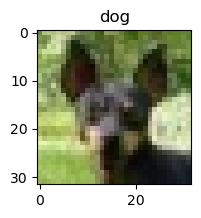

In [17]:
i =2500
label = y_train[i]
image = x_train[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title(labels[int(label)])
plt.imshow(image)
plt.show()

## Normalize the inputs and reshape the labels

In [29]:
# we removed the flattening compared to previous files
y_input = tf.keras.utils.to_categorical(y_train)
x_input = (x_train / 255.0).astype(np.float32)


## Now we'll build the convolutional layer

In [30]:
conv_layer = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),activation=tf.nn.relu,padding='same')
flat_layer = tf.keras.layers.Flatten()
dense_layer = tf.keras.layers.Dense(units=512, activation=tf.nn.relu)
logits_layer = tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)

def predict(x):
    # input Layer
    x = conv_layer(x)
    x = flat_layer(x)
    x = dense_layer(x)
    output_layer = logits_layer(x)    
    return output_layer



## Create the loss

In [31]:
@tf.function
def loss(x,y):
    y_ = predict(x)
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y_), axis=[1]))
    return cross_entropy

## Set up the training parameters

In [32]:
lr = 0.0001
train_steps = 2500
# we'll use the Adam optimizer instead of gradient descent.
optimizer = tf.optimizers.Adam(lr)

## Create a session and run the training

In [33]:
# even if we could do this quicker with keras
for i in range(train_steps):
    with tf.GradientTape() as tape:
        current_loss = loss(x_input,y_input)
        gradients = tape.gradient(current_loss, tape.watched_variables())
        optimizer.apply_gradients(zip(gradients, tape.watched_variables()))
        if i%100 == 0:
            print('Training Step:' + str(i) + ' Loss = ' + str(current_loss))

Training Step:0 Loss = tf.Tensor(2.3453634, shape=(), dtype=float32)
Training Step:100 Loss = tf.Tensor(1.3673918, shape=(), dtype=float32)
Training Step:200 Loss = tf.Tensor(1.1131486, shape=(), dtype=float32)
Training Step:300 Loss = tf.Tensor(0.9751378, shape=(), dtype=float32)
Training Step:400 Loss = tf.Tensor(0.86974025, shape=(), dtype=float32)
Training Step:500 Loss = tf.Tensor(0.7851186, shape=(), dtype=float32)
Training Step:600 Loss = tf.Tensor(0.71402955, shape=(), dtype=float32)
Training Step:700 Loss = tf.Tensor(0.6511715, shape=(), dtype=float32)
Training Step:800 Loss = tf.Tensor(0.59697926, shape=(), dtype=float32)
Training Step:900 Loss = tf.Tensor(0.54976267, shape=(), dtype=float32)
Training Step:1000 Loss = tf.Tensor(0.50397766, shape=(), dtype=float32)
Training Step:1100 Loss = tf.Tensor(0.46492556, shape=(), dtype=float32)
Training Step:1200 Loss = tf.Tensor(0.4326264, shape=(), dtype=float32)
Training Step:1300 Loss = tf.Tensor(0.39372617, shape=(), dtype=float3

In [34]:
# Accuracy for test data
x_test_input = (x_test / 255.0).astype(np.float32)

y_prob = predict(x_test_input).numpy()

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('test accuracy: ', np.sum(y_pred==y_test[:,0])/len(y_test))

(10000, 10)
test accuracy:  0.6087


In [35]:
# Accuracy for train data
y_prob = predict(x_input).numpy()  # alredy divided by 255

print(y_prob.shape)
y_pred = np.argmax(y_prob,axis=-1)
print('train accuracy: ', np.sum(y_pred==y_train[:,0])/len(y_train))

(50000, 10)
train accuracy:  0.9824


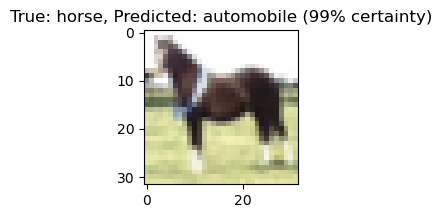

In [36]:
i=840

label = y_test[i]
image = x_test[i]
plt.figure(figsize=(2,2))
plt.grid(False)
plt.title('True: %s, Predicted: %s (%d%% certainty)' % (labels[int(label)],labels[y_prob[i].argmax()],100*y_prob[i,y_prob[i].argmax()]))
plt.imshow(image)
plt.show()